<a href="https://colab.research.google.com/github/Ronnalmil/ASIR2/blob/main/Proyecto_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRAFICOS A HACER**
📊 1. Gráfico de línea: flows a lo largo del tiempo

Qué muestra: La evolución de la cantidad de flujos en intervalos de tiempo.

Por qué es útil: Un aumento repentino en el número de flujos puede indicar un ataque DDoS (por ejemplo, miles de bots abriendo sesiones simultáneamente).

Tipo de gráfico: Line plot (x = tiempo, y = número de flujos).

Columna clave: dt vs flows

📊 2. Histograma de la tasa de paquetes (pktrate)

Qué muestra: La distribución de tasas de paquetes entre los flujos.

Por qué es útil: Un DDoS suele tener tasas anormalmente altas. Este gráfico te ayuda a ver si hay valores extremos (outliers).

Tipo de gráfico: Histograma con KDE.

Columna clave: pktrate

📊 3. Scatter plot: pktcount vs bytecount

Qué muestra: La relación entre número de paquetes y cantidad de datos transferidos por flujo.

Por qué es útil: En ataques, puede haber muchos paquetes con pocos bytes (como pings o SYNs). Te ayuda a ver patrones anómalos.

Tipo de gráfico: Diagrama de dispersión.

Columna clave: pktcount (x) vs bytecount (y)

📊 4. Gráfico de barras: Cantidad de flujos por Protocol

Qué muestra: Cuántos flujos se han realizado por cada protocolo (TCP, UDP, ICMP, etc.).

Por qué es útil: Algunos ataques se basan en protocolos específicos (ej. UDP flood, ICMP flood). Un pico en un protocolo puede indicar ataque.

Tipo de gráfico: Bar chart.

Columna clave: Protocol

📊 5. Heatmap de IPs origen (src) vs IPs destino (dst)

Qué muestra: Frecuencia de comunicación entre pares de IPs.

Por qué es útil: En un DDoS, muchas IPs de origen apuntan a una sola IP destino. Esto se ve claramente en un heatmap.

Tipo de gráfico: Mapa de calor (heatmap) de conteo.

Columnas clave: src vs dst

📊 6. Gráfico de línea: tot_kbps a lo largo del tiempo

Qué muestra: Uso total del ancho de banda (tx + rx) en el tiempo.

Por qué es útil: Un DDoS suele generar picos repentinos de tráfico. Este gráfico te permite ver esos momentos críticos.

Tipo de gráfico: Line plot.

Columna clave: dt vs tot_kbps

In [ ]:
#Link : https://www.kaggle.com/datasets/shayalvaghasiya/ddos-sdn?resource=download

# dt: Generalmente representa la marca de tiempo (datetime) en que ocurrió el evento o captura del dato.
# switch: Puede referirse al identificador del switch de red donde se capturó el paquete o flujo.
# src: Dirección IP de origen (source IP).
# dst: Dirección IP de destino (destination IP).
# pktcount: Número total de paquetes en un flujo o intervalo de tiempo.
# bytecount: Número total de bytes transferidos en ese flujo o intervalo.
# dur: Duración del flujo o sesión en segundos (o la unidad de tiempo que uses).
# dur_nsec: Duración con mayor precisión en nanosegundos (parte fraccionaria de dur).
# tot_dur: Duración total acumulada o alguna duración combinada de múltiples flujos o sesiones.
# flows: Cantidad de flujos en un intervalo o segmento de tiempo.
# packetins: Paquetes entrantes (inbound packets).
# pktperflow: Promedio de paquetes por flujo (packet count / number of flows).
# byteperflow: Promedio de bytes por flujo (byte count / number of flows).
# pktrate: Tasa de paquetes, puede ser paquetes por segundo u otra unidad de tiempo.
# Pairflow: Probablemente representa un identificador de flujo par (bidireccional), por ejemplo combinación src-dst y dst-src.
# Protocol: Protocolo de transporte o red usado (TCP, UDP, ICMP, etc.).
# port_no: Número de puerto asociado (generalmente el puerto de destino o fuente).
# tx_bytes: Bytes transmitidos (transmitted bytes).
# rx_bytes: Bytes recibidos (received bytes).
# tx_kbps: Kilobits por segundo transmitidos (tasa de transmisión).
# rx_kbps: Kilobits por segundo recibidos (tasa de recepción).
# A1 y A2: Podrían ser atributos adicionales específicos de tu dataset, como indicadores de tipo de flujo, estado, o categorías asignadas (pueden ser etiquetas o métricas personalizadas).
# tot_kbps: Total de kilobits por segundo (tx_kbps + rx_kbps).
# label: Etiqueta o clase para clasificación, por ejemplo si el flujo es benigno o malicioso (útil en aprendizaje automático).

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('dataset_sdn_normal.csv')

dataset


,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,A1,A2,tot_kbps,label
0,11425,1,167772161,167772168,45304,48294064,100,716000000,1.010000e+11,3,...,1,3,143928631,3917,0,0.0,0,0,0.0,0
1,11605,1,167772161,167772168,126395,134737070,280,734000000,2.810000e+11,2,...,1,4,3842,3520,0,0.0,0,0,0.0,0
2,11425,1,167772162,167772168,90333,96294978,200,744000000,2.010000e+11,3,...,1,1,3795,1242,0,0.0,0,0,0.0,0
3,11425,1,167772162,167772168,90333,96294978,200,744000000,2.010000e+11,3,...,1,2,3688,1492,0,0.0,0,0,0.0,0
4,11425,1,167772162,167772168,90333,96294978,200,744000000,2.010000e+11,3,...,1,3,3413,3665,0,0.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63556,5262,3,167772165,167772167,79,7742,81,842000000,8.184200e+10,5,...,64,1,15209,12720,1,1.0,0,0,2.0,0
63557,5262,3,167772165,167772167,79,7742,81,842000000,8.184200e+10,5,...,64,3,15099,14693,1,1.0,0,0,2.0,0
63558,5262,3,167772171,167772165,31,3038,31,805000000,3.180500e+10,5,...,64,2,3409,3731,0,0.0,0,0,0.0,0
63559,5262,3,167772171,167772165,31,3038,31,805000000,3.180500e+10,5,...,64,1,15209,12720,1,1.0,0,0,2.0,0


In [ ]:
rx_bytes = dataset['rx_bytes'].to_numpy()
tx_bytes = dataset['tx_bytes'].to_numpy()
protocol = dataset['Protocol'].to_numpy()

In [ ]:
dataset.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'A1', 'A2', 'tot_kbps', 'label'],
      dtype='object')

In [ ]:
#tx_bytes = dataset['tx_bytes'].to_numpy()
#tx_bytes_sum = tx_bytes.sum()
#tx_bytes_mean = tx_bytes.mean()
#tx_bytes_max = tx_bytes.max()
#tx_bytes_min= tx_bytes.min()
#print('Total de tx_bytes enviados:', tx_bytes_sum)
#print('Media de tx_bytes:', tx_bytes_mean)
#print('Maximo de tx_bytes', tx_bytes_max)
#print('Minimo de tx_bytes', tx_bytes_min)

Text(0, 0.5, 'MB transmitidos')

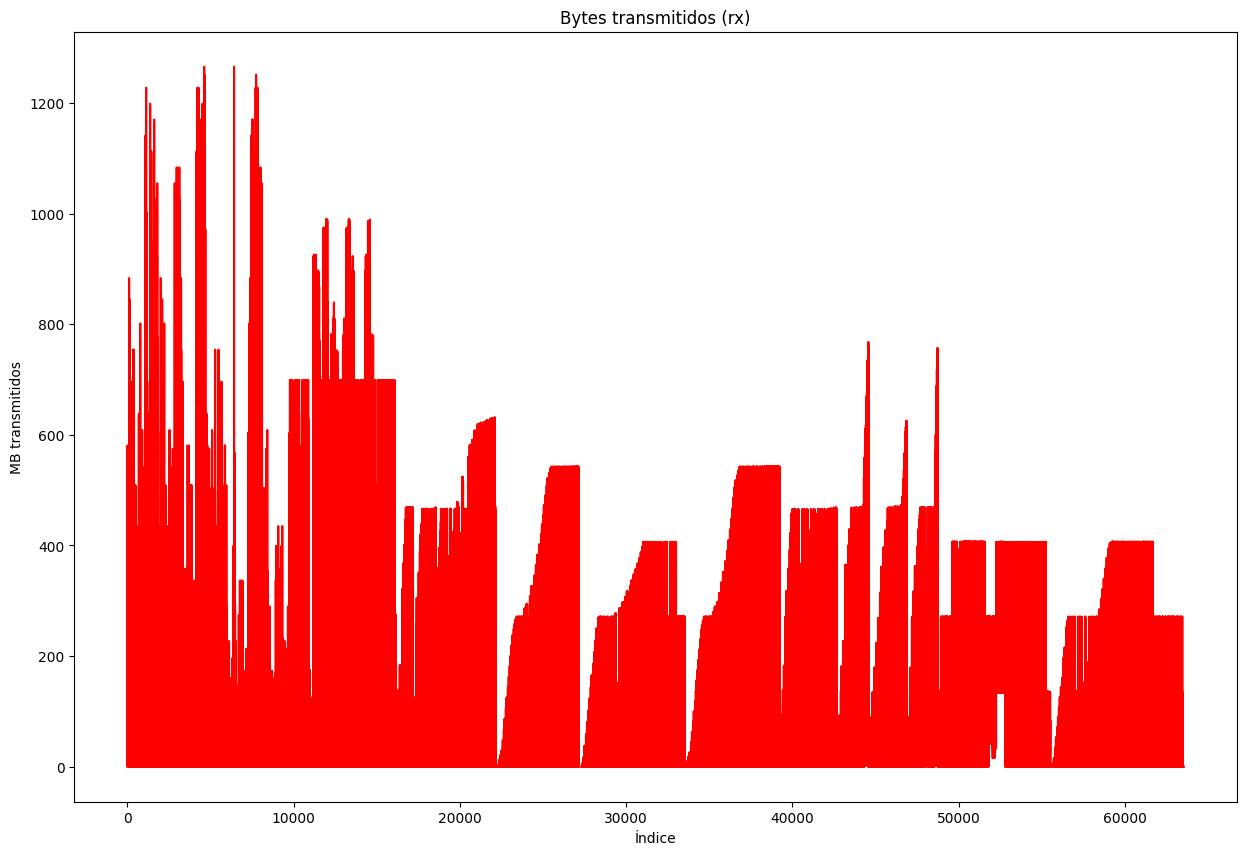

In [ ]:

tx_bytes = dataset['tx_bytes'] / 1e6  # Al tener tantos bytes los convertimos a mbs
plt.figure(figsize = (15,10))
plt.plot(tx_bytes, 'red')
plt.title('Bytes transmitidos (rx)')
plt.xlabel('Índice')
plt.ylabel('MB transmitidos')

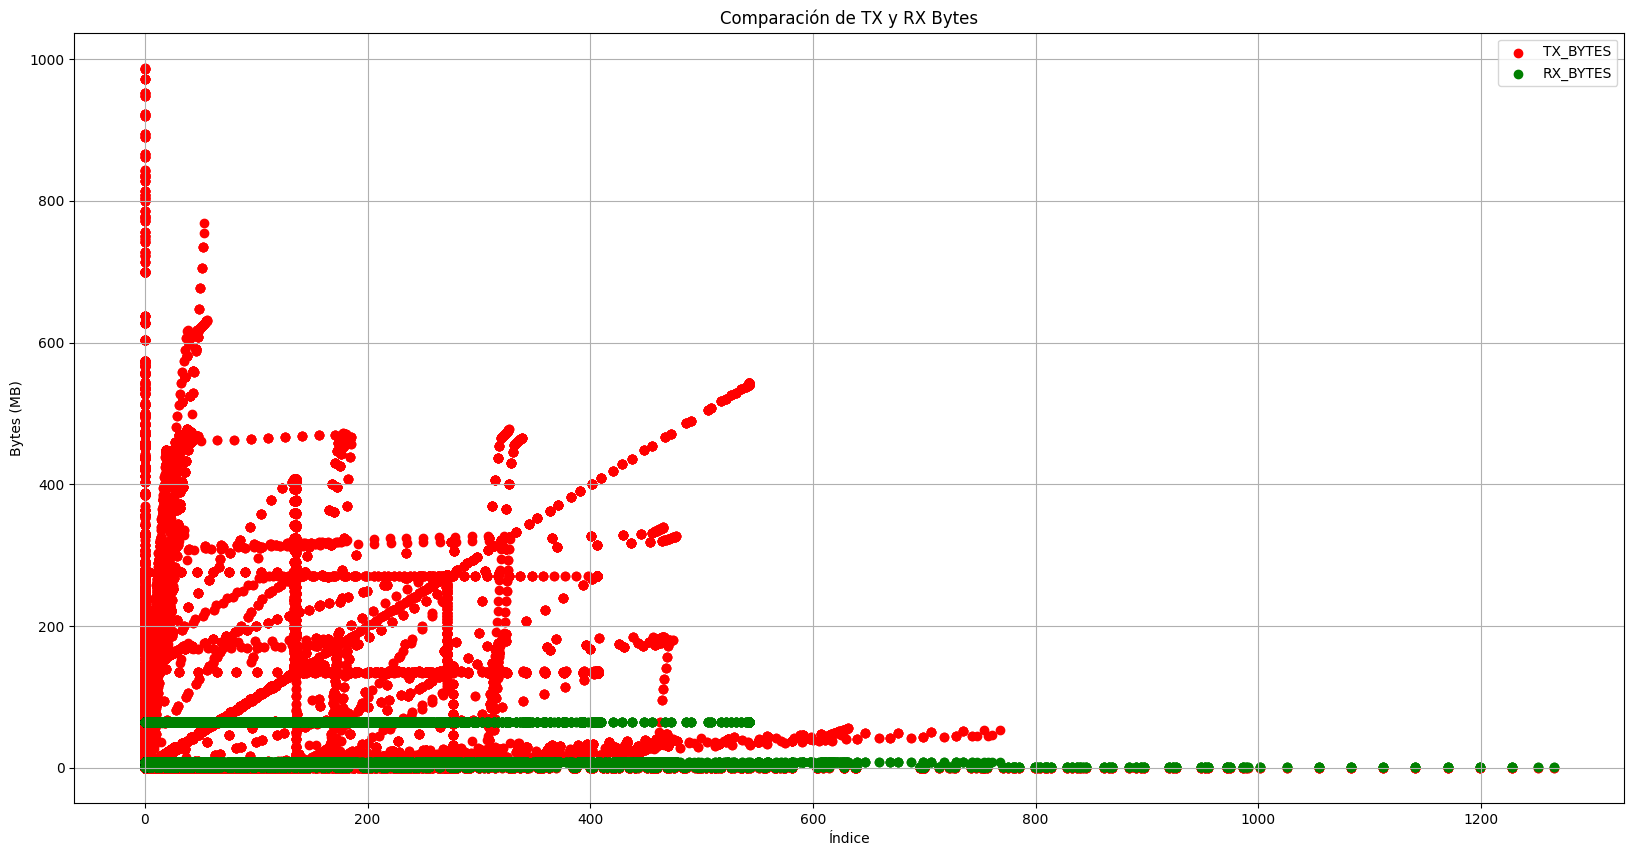

In [ ]:

tx_bytes = dataset['tx_bytes'] / 1e6
rx_bytes = dataset['rx_bytes'] / 1e6

plt.figure(figsize=(20, 10))
plt.scatter(x = tx_bytes, y = rx_bytes, color='red', label='TX_BYTES')
plt.scatter(x = tx_bytes, y = protocol, color='green', label='RX_BYTES')

plt.title('Comparación de TX y RX Bytes')
plt.xlabel('Índice')
plt.ylabel('Bytes (MB)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
tx_bytes = dataset['tx_bytes'] / 1e6
rx_bytes = dataset['rx_bytes'] / 1e6

# Graficar tx_bytes y rx_bytes con diferentes colores
plt.figure(figsize=(20, 10))
plt.scatter(range(n), tx_bytes, color='red', label='TX_BYTES')
plt.scatter(range(n), rx_bytes, color='green', label='RX_BYTES')

plt.title('Comparación de TX y RX Bytes')
plt.xlabel('Índice')
plt.ylabel('Bytes (MB)')
plt.legend()
plt.grid(True)
plt.show()